### All Data: Consensus Genotype
Size_Sample_Insertions_AllData_1000

* Size Ranges
* Training Dataset size : 1000

In [1]:
"""
Imports
"""
import pandas as pd
import numpy as np
import graphviz
import io
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


***
Training Set

Count : 1000
*** 

In [2]:
# Import Training Data
# SVanalyzer generated training data
df_train = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/rand_sampleDFs/INS/ins_samp_1000_train.csv')
df_train_2 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/rand_sampleDFs/INS/ins_samp_1000_train.csv')
df_train.rename(columns={'size': 'Size'}, inplace=True)
df_train.head(1)

,GTconflict,GTcons,GTsupp,Ill250.GT,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,...,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,sample,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,type
0,-1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,0,0,HG002,0,0.0,9351840,0,0.0,Insertion


In [3]:
train_set = pd.DataFrame()
train_set = df_train_2

In [4]:
train_set['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
train_set['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
train_set['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)

** Count of Labels in Training Set **

<a id='imbalance'></a>

In [5]:
pd.value_counts(train_set['GTcons'].values, sort=False)

Heterozygous_Variant    423
Homozygous_Reference    242
Homozygous_Variant      335
dtype: int64

***
Test Set

Count : 2893
***

<a id='hom_ref'></a>

In [6]:
# Import Test Data
# SVanalyzer generated training data
df_test = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/rand_sampleDFs/INS/ins_samp_1000_test.csv')
df_test_2 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/rand_sampleDFs/INS/ins_samp_1000_test.csv')
df_test.rename(columns={'size': 'Size'}, inplace=True)
df_test.shape

(2893, 189)

In [7]:
# Store header names in lists and find names that are NOT contained in BOTH lists
c = list(df_train.columns.values)
d = list(df_test.columns.values)
set(d) - set(c)

set()

In [8]:
### Drop columns that are not shared by both dataframes
df_train.drop(['Ill300x.GT'], axis=1, inplace = True)
df_train.drop(['Ill250.GT'], axis=1, inplace = True)
df_train.drop(['IllMP.GT'], axis=1, inplace = True)
df_train.drop(['TenX.GT'], axis=1, inplace = True)
df_train.drop(['pacbio.GT'], axis=1, inplace = True)
df_train.drop(['GTconflict'], axis=1, inplace = True)
df_train.drop(['GTsupp'], axis=1, inplace = True)
df_train.drop(['sample'], axis=1, inplace = True)
df_train.drop(['SVtype'], axis=1, inplace = True)
df_train.drop(['type'], axis=1, inplace = True)
df_train.drop(['id'], axis=1, inplace = True)

In [9]:
df_train.head(1)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.314433,104.896312,...,10145.625,2882.505114,16.0,0,0,0,0.0,9351840,0,0.0


In [10]:
df_train['chrom'].replace('X', 23, inplace=True)
df_train['chrom'].replace('Y', 24, inplace=True)
df_test['chrom'].replace('X', 23, inplace=True)
df_test['chrom'].replace('Y', 24, inplace=True)

In [11]:
# Store header names in lists and find names that are NOT contained in BOTH lists
c = list(df_train.columns.values)
d = list(df_test.columns.values)
set(d) - set(c)

{'GTconflict',
 'GTsupp',
 'Ill250.GT',
 'Ill300x.GT',
 'IllMP.GT',
 'SVtype',
 'TenX.GT',
 'id',
 'pacbio.GT',
 'sample',
 'type'}

In [12]:
### Drop columns that are not shared by both dataframes
df_test.drop(['Ill300x.GT'], axis=1, inplace = True)
df_test.drop(['Ill250.GT'], axis=1, inplace = True)
df_test.drop(['IllMP.GT'], axis=1, inplace = True)
df_test.drop(['TenX.GT'], axis=1, inplace = True)
df_test.drop(['pacbio.GT'], axis=1, inplace = True)
df_test.drop(['GTconflict'], axis=1, inplace = True)
df_test.drop(['GTsupp'], axis=1, inplace = True)
df_test.drop(['sample'], axis=1, inplace = True)
df_test.drop(['SVtype'], axis=1, inplace = True)
df_test.drop(['type'], axis=1, inplace = True)
df_test.drop(['id'], axis=1, inplace = True)

***
Import '-1' Labeled Data (Unknown Data) 
*** 

In [13]:
# Import Test Data
# SVanalyzer generated training data
df_min1 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/min1_DFs/INS/ins_HG002_min1.csv')
df_min1_2 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/min1_DFs/INS/ins_HG002_min1.csv')
df_min1.rename(columns={'size': 'Size'}, inplace=True)
df_min1.drop(['New_ID'], axis=1, inplace = True)
df_min1.drop(['index'], axis=1, inplace = True)
df_min1.shape

(2049, 189)

In [14]:
df_min1['chrom'].replace('X', 23, inplace=True)
df_min1['chrom'].replace('Y', 24, inplace=True)

In [15]:
### Drop columns that are not shared by both dataframes
df_min1.drop(['Ill300x.GT'], axis=1, inplace = True)
df_min1.drop(['Ill250.GT'], axis=1, inplace = True)
df_min1.drop(['IllMP.GT'], axis=1, inplace = True)
df_min1.drop(['TenX.GT'], axis=1, inplace = True)
df_min1.drop(['pacbio.GT'], axis=1, inplace = True)
df_min1.drop(['GTconflict'], axis=1, inplace = True)
df_min1.drop(['GTsupp'], axis=1, inplace = True)
df_min1.drop(['sample'], axis=1, inplace = True)
df_min1.drop(['SVtype'], axis=1, inplace = True)
df_min1.drop(['type'], axis=1, inplace = True)
df_min1.drop(['id'], axis=1, inplace = True)

***
Impute missing values using KNN
***

In [16]:
# Store training data in a new variable which will be converted to a matrix
X = df_train
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,900.314433,104.896312,...,10145.625,2882.505114,16.0,0,0,0,0.0,9351840,0,0.0
1,1,954.204082,38.396949,49.0,441.959184,74.758921,49.0,0.0,879.254144,132.706845,...,0.000,0.000000,0.0,0,0,0,0.0,57838730,1,1.0
2,2,951.543478,30.914121,46.0,404.369565,67.357050,46.0,0.0,830.313131,173.381995,...,0.000,0.000000,0.0,0,0,0,0.0,2376481,0,0.0


In [17]:
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)

Imputing row 1/1000 with 0 missing, elapsed time: 1.067
Imputing row 101/1000 with 62 missing, elapsed time: 1.095
Imputing row 201/1000 with 0 missing, elapsed time: 1.116
Imputing row 301/1000 with 4 missing, elapsed time: 1.129
Imputing row 401/1000 with 4 missing, elapsed time: 1.143
Imputing row 501/1000 with 8 missing, elapsed time: 1.157
Imputing row 601/1000 with 6 missing, elapsed time: 1.181
Imputing row 701/1000 with 1 missing, elapsed time: 1.195
Imputing row 801/1000 with 4 missing, elapsed time: 1.217
Imputing row 901/1000 with 1 missing, elapsed time: 1.237


In [18]:
# Store header values in a list, will be used later to re-label the matrix post KNN imputation
dftrain_header = list(df_train.columns.values)
X.columns = dftrain_header
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,900.314433,104.896312,...,10145.625,2882.505114,16.0,0.0,0.0,0.0,0.0,9351840.0,0.0,0.0
1,1.0,954.204082,38.396949,49.0,441.959184,74.758921,49.0,0.0,879.254144,132.706845,...,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,57838730.0,1.0,1.0
2,2.0,951.543478,30.914121,46.0,404.369565,67.357050,46.0,0.0,830.313131,173.381995,...,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,2376481.0,0.0,0.0


In [19]:
# Store Labels in a new 'Y' DataFrame
Y = pd.DataFrame()
Y = X['GTcons']

In [20]:
#Count the number of labels
pd.value_counts(Y.values, sort=False)

0.0    242
1.0    423
2.0    335
dtype: int64

In [21]:
# Remove labels from feature set
X.drop(['GTcons'],axis=1, inplace = True)

In [22]:
# Order features
X4 = X.reindex_axis(sorted(X.columns), axis=1)

***
Machine Learning
***

<a id='machine_learning'></a>

** Train Random Forest Classifier **

<a id='multi_run'></a>

** Determine Number of trees: Out of Bag Error **

In [23]:
# Train Test Split
# Train on 70% of the data and test on 30%
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.3)

In [24]:
# Train Random Forest Classifier
model = RandomForestClassifier(oob_score=True) 
model.fit(X_train, y_train)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [25]:
print('The OOB prediction of accuracy is: {oob}%'.format(oob=model.oob_score_ * 100))

The OOB prediction of accuracy is: 94.57142857142857%


In [26]:
sns.set_style("white")

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py

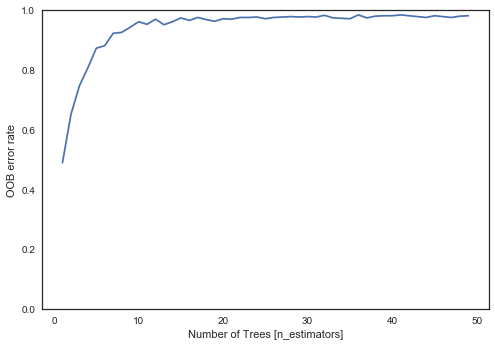

In [27]:
n_estimators = 50
trees = []
oob = []
for i in range(1, n_estimators):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train)
    trees += [i]
    oob += [model.oob_score_] 
    
    
df_oob = pd.DataFrame()
df_oob['trees'] = trees
df_oob['oob'] = oob


plt.plot(trees, oob)

plt.xlabel("Number of Trees [n_estimators]")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.ylim(0, 1.0)
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/1000_train/ins_alldata_1000_trees_oob.png', bbox_inches='tight')
plt.show()

** Train Model Using Optimal Tuning Parameters**

In [28]:
model = RandomForestClassifier(n_estimators=25, random_state=4, class_weight="balanced") 
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False, random_state=4,
            verbose=0, warm_start=False)

In [29]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for INPLACE sorting



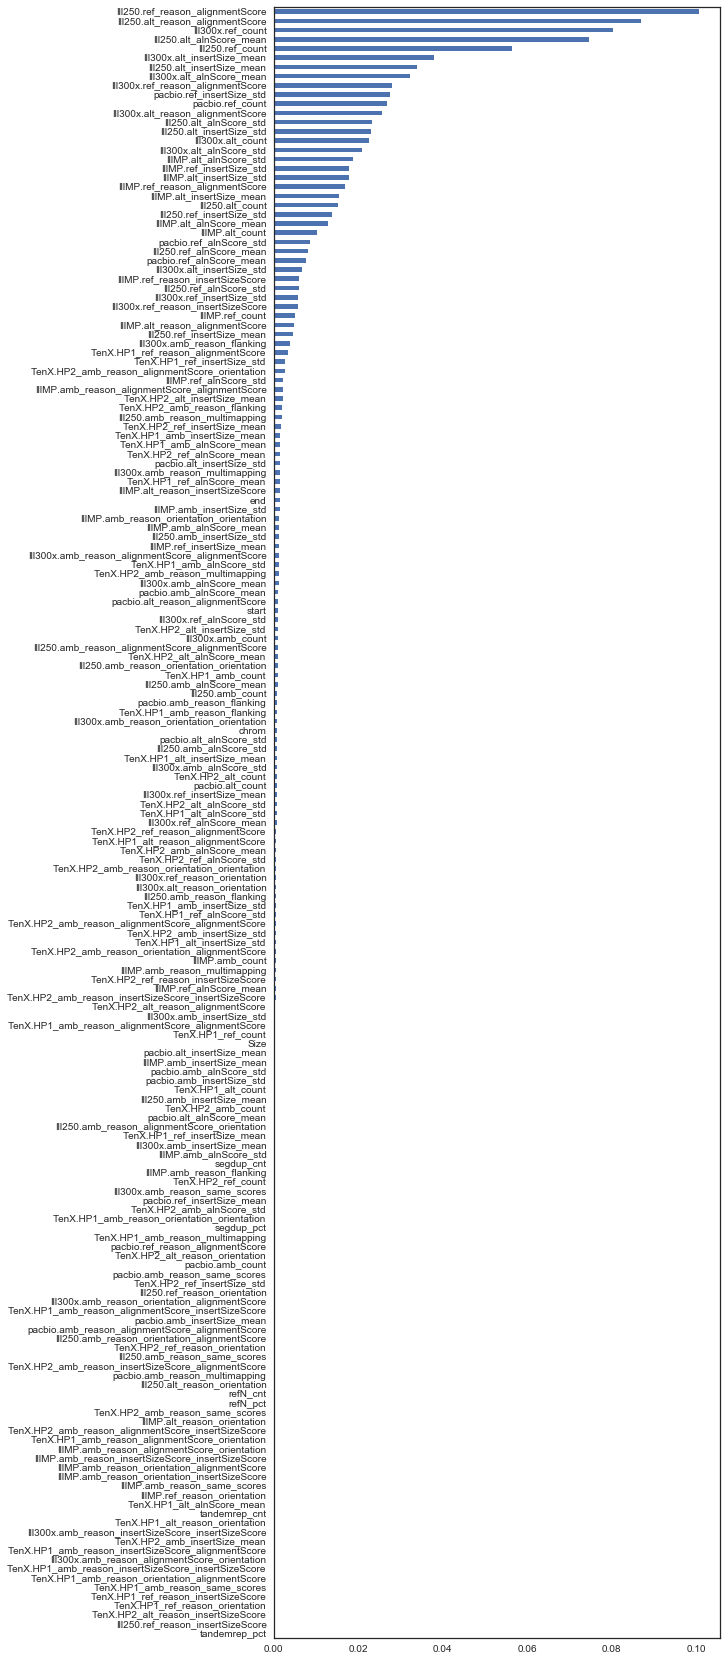

In [30]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(8,30))
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/1000_train/ins_alldata_1000_featImp.png', bbox_inches='tight')
plt.show()


In [31]:
feature_importances.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/1000_train/ins_alldata_1000_featImp.csv')

In [32]:
X_ = X4[['Ill250.ref_reason_alignmentScore','Ill250.alt_reason_alignmentScore','Ill300x.ref_count','Ill250.alt_alnScore_mean','Ill250.ref_count','Ill300x.alt_insertSize_mean','Ill250.alt_insertSize_mean','Ill300x.alt_alnScore_mean','Ill300x.ref_reason_alignmentScore','pacbio.ref_insertSize_std','pacbio.ref_count','Ill300x.alt_reason_alignmentScore','Ill250.alt_alnScore_std','Ill250.alt_insertSize_std','Ill300x.alt_count','Ill300x.alt_alnScore_std','IllMP.alt_alnScore_std','IllMP.ref_insertSize_std','IllMP.alt_insertSize_std','IllMP.ref_reason_alignmentScore','IllMP.alt_insertSize_mean','Ill250.alt_count','Ill250.ref_insertSize_std','IllMP.alt_alnScore_mean','IllMP.alt_count']]

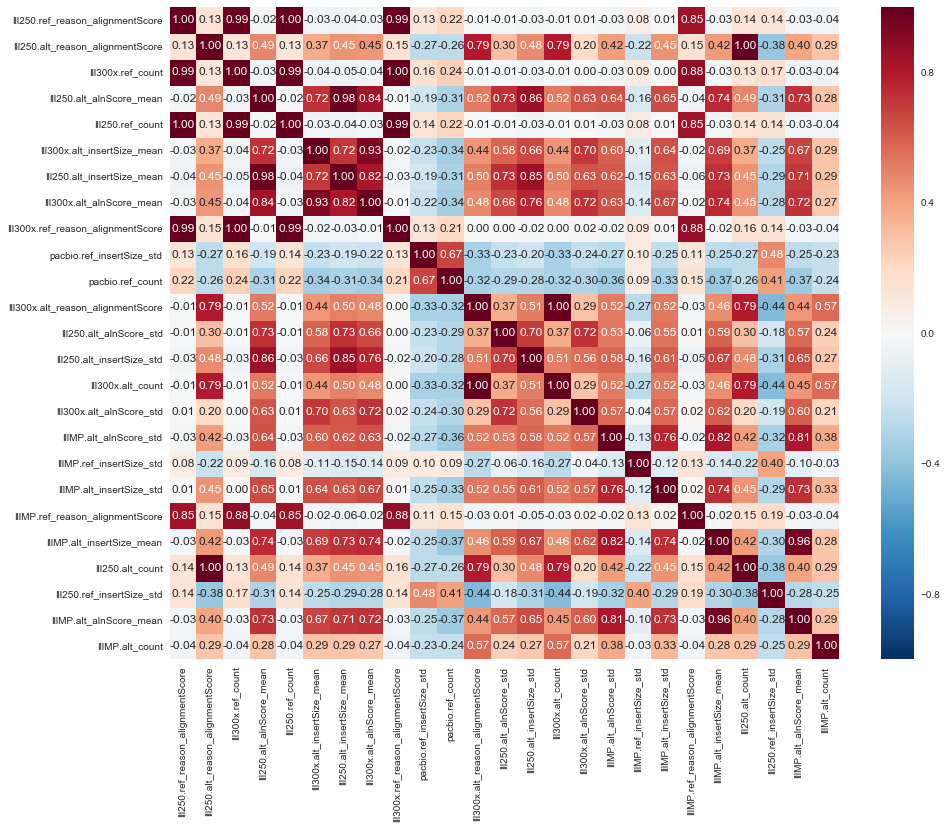

In [33]:
plt.figure(figsize=(15, 12))
sns.heatmap(X_.corr(), annot=True, fmt=".2f")
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/1000_train/ins_alldata_1000_heatmap.png', bbox_inches='tight')
plt.show()

In [34]:
pred = model.predict(X_test)

In [35]:
print('Precision score of the training subset: {:.3f}'.format(precision_score(y_test, pred, average='micro'))) 
from sklearn.metrics import accuracy_score
print('Accuracy score of the training subset: {:.3f}'.format(accuracy_score(y_test, pred))) 

Precision score of the training subset: 0.963
Accuracy score of the training subset: 0.963


In [36]:
# Add original labels and predicted labels back to the original dataframe
df_Xtest = pd.DataFrame(X_test)
labels = pd.DataFrame(y_test)

In [37]:
df_Xtest['predicted_label'] = pred
df_Xtest['GTcons'] = df_train['GTcons']
df_Xtest['chrom'] = df_train['chrom']
df_Xtest['start'] = df_train['start']
df_Xtest['end'] = df_train['end']

In [38]:
df_Xtest['GTcons'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['GTcons'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['GTcons'].replace(2.0, 'Homozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['predicted_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [39]:
pd.value_counts(df_Xtest['GTcons'].values, sort=False)

Heterozygous_Variant    121
Homozygous_Reference     68
Homozygous_Variant      111
dtype: int64

In [40]:
pd.value_counts(df_Xtest['predicted_label'].values, sort=False)

Heterozygous_Variant    118
Homozygous_Reference     70
Homozygous_Variant      112
dtype: int64

In [41]:
from sklearn.metrics import confusion_matrix
ytest = df_Xtest['GTcons']
predict = df_Xtest['predicted_label']
print(confusion_matrix(ytest, predict))

[[114   3   4]
 [  1  67   0]
 [  3   0 108]]


In [42]:
pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,114,3,4,121
Homozygous_Reference,1,67,0,68
Homozygous_Variant,3,0,108,111
All,118,70,112,300


In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       0.97      0.94      0.95       121
Homozygous_Reference       0.96      0.99      0.97        68
  Homozygous_Variant       0.96      0.97      0.97       111

         avg / total       0.96      0.96      0.96       300



***
Predict

Predict labels for test set
***

** Load Data **

In [44]:
df_test.drop(['GTcons'],axis=1, inplace=True)
X2 = df_test

** Impute missing values using KNN **

In [45]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/2893 with 0 missing, elapsed time: 7.741
Imputing row 101/2893 with 0 missing, elapsed time: 7.742
Imputing row 201/2893 with 0 missing, elapsed time: 7.744
Imputing row 301/2893 with 0 missing, elapsed time: 7.754
Imputing row 401/2893 with 0 missing, elapsed time: 7.756
Imputing row 501/2893 with 6 missing, elapsed time: 7.789
Imputing row 601/2893 with 6 missing, elapsed time: 7.817
Imputing row 701/2893 with 6 missing, elapsed time: 7.844
Imputing row 801/2893 with 6 missing, elapsed time: 7.869
Imputing row 901/2893 with 8 missing, elapsed time: 7.921
Imputing row 1001/2893 with 8 missing, elapsed time: 7.958
Imputing row 1101/2893 with 8 missing, elapsed time: 7.989
Imputing row 1201/2893 with 8 missing, elapsed time: 8.021
Imputing row 1301/2893 with 8 missing, elapsed time: 8.057
Imputing row 1401/2893 with 1 missing, elapsed time: 8.099
Imputing row 1501/2893 with 22 missing, elapsed time: 8.112
Imputing row 1601/2893 with 1 missing, elapsed time: 8.121
Imputing

In [46]:
df_test_header = list(df_test.columns.values)
X2.columns = df_test_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,Ill250.amb_count,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,958.307692,17.827742,52.0,403.673077,79.999452,52.0,0.0,867.666667,144.039804,177.0,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,919991.0,1.0,1.0
1,958.307692,17.827742,52.0,403.673077,79.999452,52.0,0.0,867.666667,144.039804,177.0,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,919991.0,1.0,1.0
2,963.888889,16.288677,18.0,472.444444,78.418551,18.0,0.0,886.582353,150.981872,170.0,...,10512.52632,3952.191069,19.0,0.0,0.0,0.0,0.0,2533554.0,0.0,0.0


In [47]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,Ill250.amb_count,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,958.307692,17.827742,52.0,403.673077,79.999452,52.0,0.0,867.666667,144.039804,177.0,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,919991.0,1.0,1.0
1,958.307692,17.827742,52.0,403.673077,79.999452,52.0,0.0,867.666667,144.039804,177.0,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,919991.0,1.0,1.0
2,963.888889,16.288677,18.0,472.444444,78.418551,18.0,0.0,886.582353,150.981872,170.0,...,10512.52632,3952.191069,19.0,0.0,0.0,0.0,0.0,2533554.0,0.0,0.0


In [48]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

In [49]:
pred = model.predict(X5)
pred_prob = model.predict_proba(X5)
pred_prob_log = model.predict_log_proba(X5)

In [50]:
X5['predicted_label'] = pred
X5['chrom'] = df_test_2['chrom']
X5['GTcons'] = df_test_2['GTcons']
X5['start'] = df_test_2['start']
X5['end'] = df_test_2['end']
X5['Size'] = df_test_2['Size']
X5['GTsupp'] = df_test_2['GTsupp']

In [51]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])
X6.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/1000_train/dataframes/df_alldata_1000_df1.csv', index=False)

In [52]:
X6 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/1000_train/dataframes/df_alldata_1000_df1.csv')

In [53]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [54]:
X6.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/1000_train/dataframes/df_alldata_1000_df2.csv')

In [55]:
X6['GTcons'].dtypes

dtype('int64')

In [56]:
# Drop NaN Labels
X6 = X6[np.isfinite(X6['GTcons'])]
X6 = X6[np.isfinite(X6['predicted_GTcons_label'])]

***
Label Analysis
***

In [57]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[ 693    3    3]
 [  14 1173   17]
 [   9   20  961]]


In [58]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [59]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.977
Accuracy score of the prediction subset: 0.977


In [60]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,1173,14,17,1204
Homozygous_Reference,3,693,3,699
Homozygous_Variant,20,9,961,990
All,1196,716,981,2893


** Labels with Pred_Prob >=0.9 **

In [61]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]

In [62]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,928,0,0,928
Homozygous_Reference,0,525,0,525
Homozygous_Variant,3,0,746,749
All,931,525,746,2202


In [63]:
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00       928
Homozygous_Reference       1.00      1.00      1.00       525
  Homozygous_Variant       1.00      1.00      1.00       749

         avg / total       1.00      1.00      1.00      2202



***
Predict

Predict labels for minus 1 (unknown label) set
***

** Load Data **

In [64]:
df_min1.drop(['GTcons'],axis=1, inplace=True)
X2 = df_min1

** Impute missing values using KNN **

In [65]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/2049 with 0 missing, elapsed time: 3.545
Imputing row 101/2049 with 0 missing, elapsed time: 3.548
Imputing row 201/2049 with 0 missing, elapsed time: 3.564
Imputing row 301/2049 with 0 missing, elapsed time: 3.566
Imputing row 401/2049 with 6 missing, elapsed time: 3.611
Imputing row 501/2049 with 6 missing, elapsed time: 3.640
Imputing row 601/2049 with 6 missing, elapsed time: 3.671
Imputing row 701/2049 with 6 missing, elapsed time: 3.694
Imputing row 801/2049 with 8 missing, elapsed time: 3.744
Imputing row 901/2049 with 8 missing, elapsed time: 3.779
Imputing row 1001/2049 with 8 missing, elapsed time: 3.810
Imputing row 1101/2049 with 1 missing, elapsed time: 3.863
Imputing row 1201/2049 with 1 missing, elapsed time: 3.878
Imputing row 1301/2049 with 1 missing, elapsed time: 3.890
Imputing row 1401/2049 with 62 missing, elapsed time: 3.917
Imputing row 1501/2049 with 1 missing, elapsed time: 3.942
Imputing row 1601/2049 with 1 missing, elapsed time: 3.961
Imputing

In [66]:
df_min1_header = list(df_min1.columns.values)
X2.columns = df_min1_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,Ill250.amb_count,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,876.727273,32.283097,11.0,465.909091,74.904126,11.0,0.0,823.752174,145.390881,230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1004213.0,1.0,1.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,813.630873,161.779880,149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1219549.0,1.0,1.0
2,913.571429,24.818525,7.0,410.285714,52.562111,7.0,0.0,845.492823,158.682558,209.0,...,10175.0,0.0,1.0,0.0,0.0,0.0,0.0,6802561.0,1.0,1.0


In [67]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,Ill250.amb_count,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,876.727273,32.283097,11.0,465.909091,74.904126,11.0,0.0,823.752174,145.390881,230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1004213.0,1.0,1.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,813.630873,161.779880,149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1219549.0,1.0,1.0
2,913.571429,24.818525,7.0,410.285714,52.562111,7.0,0.0,845.492823,158.682558,209.0,...,10175.0,0.0,1.0,0.0,0.0,0.0,0.0,6802561.0,1.0,1.0


In [68]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

In [69]:
pred = model.predict(X5)
pred_prob = model.predict_proba(X5)
pred_prob_log = model.predict_log_proba(X5)

In [70]:
X5['predicted_label'] = pred
X5['chrom'] = df_min1_2['chrom']
X5['GTcons'] = df_min1_2['GTcons']
X5['start'] = df_min1_2['start']
X5['end'] = df_min1_2['end']
X5['Size'] = df_min1_2['Size']
X5['GTsupp'] = df_min1_2['GTsupp']

In [71]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])
X6.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/1000_train/dataframes/df_alldata_1000_min1_df1.csv', index=False)

In [72]:
X6 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/1000_train/dataframes/df_alldata_1000_min1_df1.csv')

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.



In [75]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [76]:
X6.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/1000_train/dataframes/df_alldata_1000_min1_df2.csv')